Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, RandomContrast

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
TRAIN_DIRECTORY_PATH = 'images/Train'
TEST_DIRECTORY_PATH = 'images/Test'

In [4]:
## Cleanup images in output directory to start fresh
from glob import glob
for file in glob(os.path.join(TRAIN_DIRECTORY_PATH, '*', 'output', '*')):
    os.remove(file)
                        

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(TRAIN_DIRECTORY_PATH)
data_dir_test = pathlib.Path(TEST_DIRECTORY_PATH)

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  #validation_split = 0.2,
  #subset='training',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  #validation_split = 0.2,
  #subset='validation',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

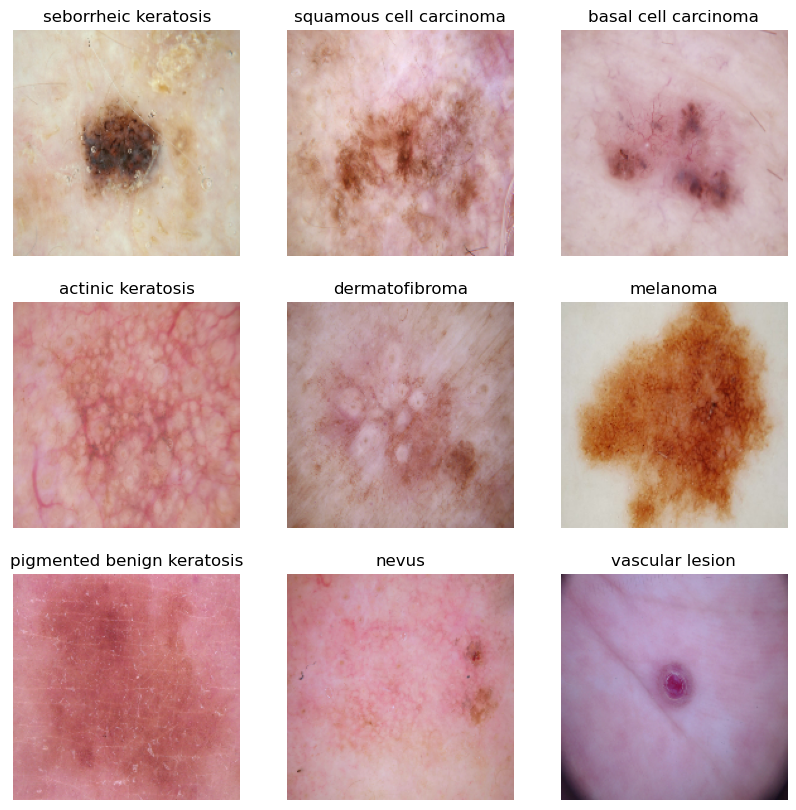

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
classes_to_print = class_names.copy()
plt.figure(figsize=(10, 10))

def plot_image(image, class_name):
    ax = plt.subplot(3, 3, len(classes_to_print))
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(class_name)
    plt.axis("off")

for images, labels in train_ds:
    if len(classes_to_print) == 0:
        # To exit the loop early if one image for all classes are printed
        break
    for image, label in zip(images, labels):
        if len(classes_to_print) == 0:
            # To exit the loop early if one image for all classes are printed
            break
        class_name = class_names[label]
        if class_name in classes_to_print:
            plot_image(image, class_name)
            classes_to_print.remove(class_name)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here

model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(64, kernel_size=(3, 3), padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(len(class_names), activation='softmax'))

model.summary()
 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
optimizer = 'adam'

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size = 32,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 26s 312ms/step - loss: 2.0351 - accuracy: 0.2305 - val_loss: 2.2559 - val_accuracy: 0.1949
Epoch 2/20
70/70 [==============================] - 20s 289ms/step - loss: 1.7781 - accuracy: 0.3595 - val_loss: 2.6122 - val_accuracy: 0.2542
Epoch 3/20
70/70 [==============================] - 20s 287ms/step - loss: 1.5335 - accuracy: 0.4596 - val_loss: 2.0710 - val_accuracy: 0.2966
Epoch 4/20
70/70 [==============================] - 20s 287ms/step - loss: 1.4200 - accuracy: 0.5105 - val_loss: 2.1546 - val_accuracy: 0.3305
Epoch 5/20
70/70 [==============================] - 20s 288ms/step - loss: 1.3431 - accuracy: 0.5355 - val_loss: 2.3936 - val_accuracy: 0.3898
Epoch 6/20
70/70 [==============================] - 20s 288ms/step - loss: 1.2318 - accuracy: 0.5583 - val_loss: 2.3630 - val_accuracy: 0.3220
Epoch 7/20
70/70 [==============================] - 20s 287ms/step - loss: 1.2012 - accuracy: 0.5695 - val_loss: 2.2985 - val_accuracy: 0.3305

### Visualizing training results

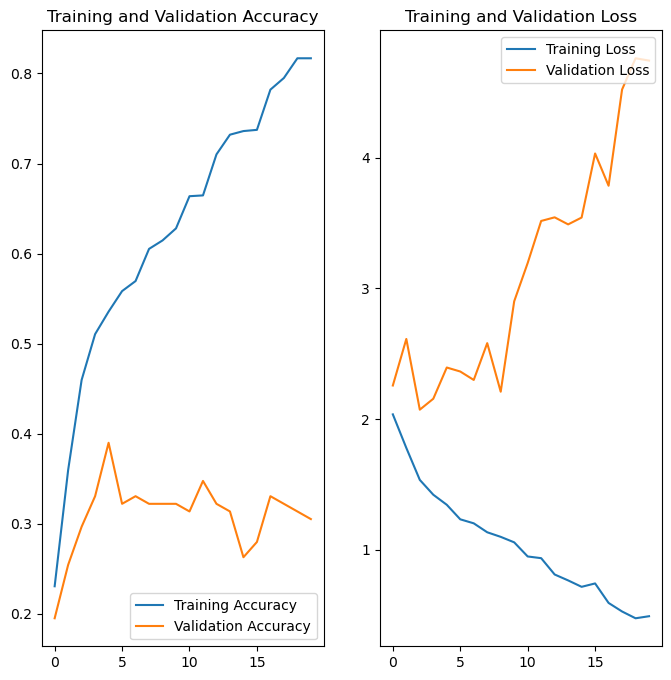

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

1. Training accuracy is 92%.
2. Validation accuracy reached only upto 27%.
3. Training Loss is decreasing.
4. Validation Loss is high.

### Conclusions
- The high training accuracy and low validation accuracy is a sign of overfitting.
- The low training loss and high validation loss is a sign of overfitting.

From the above points, we can conclude that the model is ***overfitting***.

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
augmentation_strategy = keras.Sequential()
augmentation_strategy.add(RandomFlip("horizontal", input_shape=(img_height, img_width, 3)))
augmentation_strategy.add(RandomRotation(0.1))
augmentation_strategy.add(RandomZoom(0.1))
augmentation_strategy.add(RandomContrast(0.1))

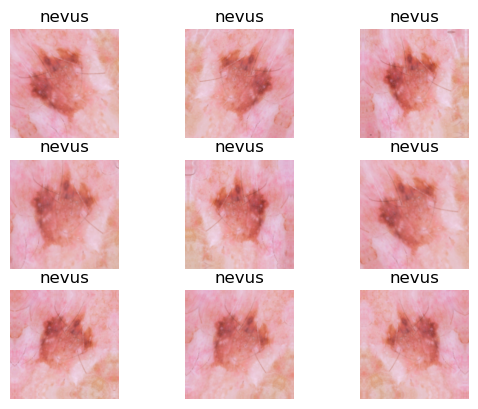

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# Pick first batch of image and label
for images, labels in train_ds.take(1):
    label = class_names[labels[0]]
    for i in range(9):
        augmented_images = augmentation_strategy(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [23]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes he

model = Sequential()
model.add(augmentation_strategy)

model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(64, kernel_size=(3, 3), padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(layers.Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(len(class_names), activation='softmax'))

model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 90, 90, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 64)        36928     
                                                      

### Compiling the model

In [24]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training the model

In [25]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 23s 315ms/step - loss: 2.2893 - accuracy: 0.2314 - val_loss: 2.1568 - val_accuracy: 0.1864
Epoch 2/20
70/70 [==============================] - 22s 313ms/step - loss: 1.7064 - accuracy: 0.3828 - val_loss: 2.0542 - val_accuracy: 0.2373
Epoch 3/20
70/70 [==============================] - 22s 314ms/step - loss: 1.5813 - accuracy: 0.4359 - val_loss: 1.9867 - val_accuracy: 0.3051
Epoch 4/20
70/70 [==============================] - 22s 314ms/step - loss: 1.5035 - accuracy: 0.4703 - val_loss: 2.2126 - val_accuracy: 0.2627
Epoch 5/20
70/70 [==============================] - 22s 312ms/step - loss: 1.5260 - accuracy: 0.4743 - val_loss: 1.9182 - val_accuracy: 0.3644
Epoch 6/20
70/70 [==============================] - 22s 313ms/step - loss: 1.4183 - accuracy: 0.5150 - val_loss: 2.0292 - val_accuracy: 0.3136
Epoch 7/20
70/70 [==============================] - 22s 315ms/step - loss: 1.3751 - accuracy: 0.5167 - val_loss: 1.8162 - val_accuracy: 0.3475

### Visualizing the results

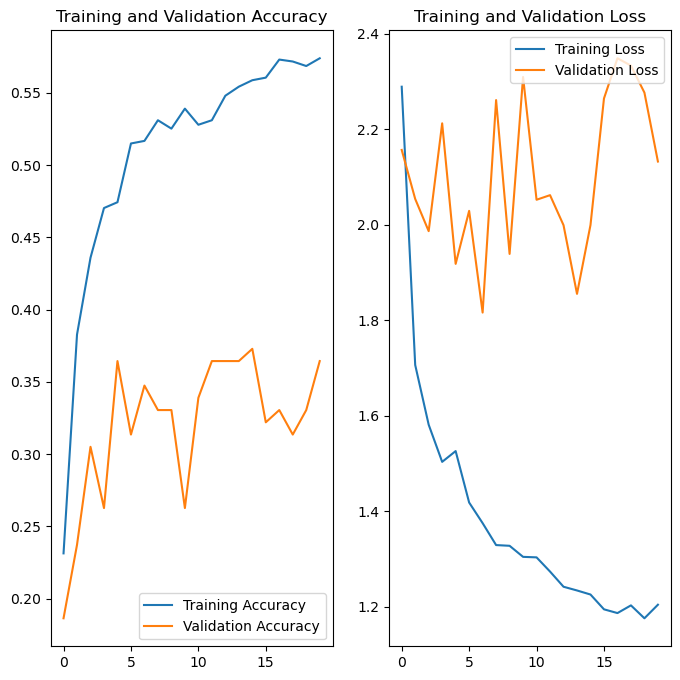

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [27]:
## Your code goes here.
from glob import glob

images_path_list = [ i for i in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]

images_path_list

labels = [ x.split('/')[2] for x in images_path_list ]

labels_df = pd.DataFrame({'label': labels })
counts = labels_df.value_counts()

print(counts)

label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='label'>

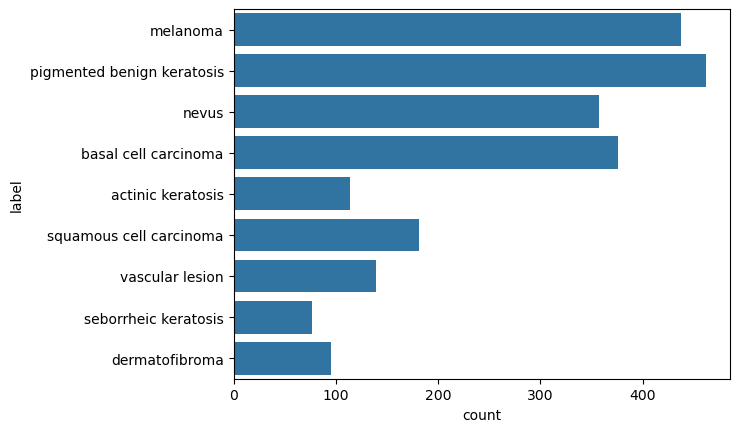

In [28]:
import seaborn as sns
sns.countplot(data=labels_df, y="label")


In [29]:
round(labels_df[['label']].value_counts(normalize=True)*100, 2)

label                     
pigmented benign keratosis    20.63
melanoma                      19.56
basal cell carcinoma          16.79
nevus                         15.94
squamous cell carcinoma        8.08
vascular lesion                6.21
actinic keratosis              5.09
dermatofibroma                 4.24
seborrheic keratosis           3.44
Name: proportion, dtype: float64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### Which class has the least number of samples?
From the above, ***seborrheic keratosis*** have the least number of samples

#### - Which classes dominate the data in terms proportionate number of samples?
As listed above, the class **pigmented benign keratosis (20.63%)**, **melanoma (19.56%)** is dominating.  

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [30]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [31]:
path_to_training_dataset=str(data_dir_train.resolve()) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /home/jovyan/work/notebook/images/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0xFFFF72577B10>: 100%|██████████| 500/500 [00:00<00:00, 546.43 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to /home/jovyan/work/notebook/images/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0xFFFF72521790>: 100%|██████████| 500/500 [00:00<00:00, 549.44 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to /home/jovyan/work/notebook/images/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0xFFFEE838D7D0>: 100%|██████████| 500/500 [00:00<00:00, 545.78 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to /home/jovyan/work/notebook/images/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0xFFFED15F0590>: 100%|██████████| 500/500 [00:02<00:00, 173.32 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to /home/jovyan/work/notebook/images/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0xFFFEE9712C90>: 100%|██████████| 500/500 [00:03<00:00, 153.10 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to /home/jovyan/work/notebook/images/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0xFFFEE8284410>: 100%|██████████| 500/500 [00:00<00:00, 523.05 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /home/jovyan/work/notebook/images/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0xFFFEE8264790>: 100%|██████████| 500/500 [00:01<00:00, 329.31 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to /home/jovyan/work/notebook/images/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0xFFFEE82A3310>: 100%|██████████| 500/500 [00:00<00:00, 541.39 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /home/jovyan/work/notebook/images/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0xFFFED15A5B10>: 100%|██████████| 500/500 [00:00<00:00, 529.81 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [32]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [33]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['images/Train/melanoma/output/melanoma_original_ISIC_0010555.jpg_5a7cb2d9-4c9f-4220-83bc-8a8b28d6faeb.jpg',
 'images/Train/melanoma/output/melanoma_original_ISIC_0010938.jpg_6cffc48f-e463-4f35-9eba-7f1d9def0b43.jpg',
 'images/Train/melanoma/output/melanoma_original_ISIC_0000428.jpg_b9afdb27-8fe7-4fdc-9c19-665ca61b6d60.jpg',
 'images/Train/melanoma/output/melanoma_original_ISIC_0010137.jpg_f987a2a8-e22d-4368-8d28-1bf66783bd4a.jpg',
 'images/Train/melanoma/output/melanoma_original_ISIC_0010231.jpg_8e2731c5-0092-4678-8169-28575da8ac90.jpg',
 'images/Train/melanoma/output/melanoma_original_ISIC_0000459.jpg_c59f5e6d-7bed-4f13-95ac-748e77e62e48.jpg',
 'images/Train/melanoma/output/melanoma_original_ISIC_0001126.jpg_bc1432ff-4e01-4099-b7c4-9c1a833f0e56.jpg',
 'images/Train/melanoma/output/melanoma_original_ISIC_0010979.jpg_9e983351-9594-488b-a8ba-ae586ccd4913.jpg',
 'images/Train/melanoma/output/melanoma_original_ISIC_0010322.jpg_41ff2833-6cc3-44b9-95b1-0f8f79f4a7c1.jpg',
 'images/Train/mela

In [34]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [35]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [37]:
df2 = pd.DataFrame({ 'label': lesion_list_new})
new_df = pd.concat([labels_df, df2])

In [38]:
new_df['label'].value_counts()

label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [40]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [42]:
## your code goes here

model = Sequential()
model.add(augmentation_strategy)

model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(64, kernel_size=(3, 3), padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(layers.Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(len(class_names), activation='softmax'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 90, 90, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 64)        36928     
                                                      

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [43]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:

## Your code goes here, use 50 epochs.
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 58s 336ms/step - loss: 2.3049 - accuracy: 0.1356 - val_loss: 2.1864 - val_accuracy: 0.1373
Epoch 2/50
169/169 [==============================] - 57s 335ms/step - loss: 2.1615 - accuracy: 0.1669 - val_loss: 2.0761 - val_accuracy: 0.1967
Epoch 3/50
169/169 [==============================] - 57s 334ms/step - loss: 1.8899 - accuracy: 0.2736 - val_loss: 1.6779 - val_accuracy: 0.3682
Epoch 4/50
169/169 [==============================] - 57s 334ms/step - loss: 1.6159 - accuracy: 0.3843 - val_loss: 1.5166 - val_accuracy: 0.4291
Epoch 5/50
169/169 [==============================] - 59s 347ms/step - loss: 1.4786 - accuracy: 0.4316 - val_loss: 1.4196 - val_accuracy: 0.4595
Epoch 6/50
169/169 [==============================] - 57s 334ms/step - loss: 1.4257 - accuracy: 0.4533 - val_loss: 1.4695 - val_accuracy: 0.4603
Epoch 7/50
169/169 [==============================] - 57s 334ms/step - loss: 1.3616 - accuracy: 0.4763 - val_loss: 1.3161 - val_ac

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

